<a href="https://colab.research.google.com/github/mahesh2301/MaheshSharma/blob/main/TimeSeries_DailyTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/IIT_Madras/MaunaLoaDailyTemps.csv")

In [ ]:
data

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [ ]:
data.describe()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1821.000000,1821.000000,1821.000000,1825.000000,1825.000000
mean,38.637013,54.515102,46.818781,607.074521,1823.002740
std,3.798284,5.013654,4.143192,40.797585,49.555065
min,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,41.000000,58.000000,50.000000,640.000000,1851.000000
max,49.000000,67.000000,57.000000,700.000000,1905.000000


### 1. How many Days Average temperature exceeds 50 celsius?

In [ ]:
df=pd.DataFrame(data)


In [ ]:
count=(df['AvgTemp']>50).sum()
count

331

According to the output there are 331 days, where the average temperature exceeds 50 celsius.

### 2. Which year will be termed as the hottest year?

In [ ]:
data['DATE']=pd.to_datetime(data['DATE'])

In [ ]:
data.index

RangeIndex(start=0, stop=1825, step=1)

In [ ]:

data.index=data['DATE']

In [ ]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,,
2014-01-01,2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,2014-01-05,24.0,38.0,31.0,658,1758


In [ ]:
del data['DATE']

In [ ]:
data

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [ ]:
data.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [ ]:
hottest_year=data.loc[data['MaxTemp']==data['MaxTemp'].max()]
hottest_year

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2015-06-18,45.0,67.0,56.0,544,1903
2016-07-03,45.0,67.0,56.0,548,1905


According to the output data, the hottest years can be 2015 and 2016. Because the ***MaxTemp*** columns has the highest degree celsius to be 67.0.



In [ ]:
data['MaxTemp'].value_counts()[67]

2

### 3. How you will be handling missing values in this dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [ ]:
data.isnull().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
data['MaxTemp'].fillna(float(data['MaxTemp'].median()),inplace=True)
data['MinTemp'].fillna(float(data['MaxTemp'].median()),inplace=True)
data['AvgTemp'].fillna(float(data['MaxTemp'].median()),inplace=True)
data.dropna()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [ ]:
data.describe()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,38.672877,54.516164,46.836712,607.074521,1823.002740
std,3.870555,5.008205,4.156303,40.797585,49.555065
min,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,41.000000,58.000000,50.000000,640.000000,1851.000000
max,55.000000,67.000000,57.000000,700.000000,1905.000000


In [ ]:
data.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

The missing data was filled with median. As this method is the robust and more suitable according to the data.

### 4. Which columns are not having any kind of relationship with the MaxTemp column?

In [ ]:
data.corr()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
MinTemp,1.000000,0.742027,0.913726,-0.421661,0.294268
MaxTemp,0.742027,1.000000,0.947406,-0.374763,0.275688
AvgTemp,0.913726,0.947406,1.000000,-0.422408,0.303171
Sunrise,-0.421661,-0.374763,-0.422408,1.000000,-0.739530
Sunset,0.294268,0.275688,0.303171,-0.739530,1.000000


The correlation of MaxTemp shows a correlation with all the columns. But, the Sunrise shows a negative correlation hence it can be least considered column as per the question. 

### 5. Which of the following Order is the best order for ARIMA Model on top of the Above Dataset.

In [ ]:
#!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

#ImportError: cannot import name 'Appender' from 'statsmodels.compat.pandas'

In [ ]:

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.eval_measures import aic,bic
import pmdarima as pm

model_avg = pm.auto_arima(data['AvgTemp'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_avg.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=8463.462, Time=5.63 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=10382.011, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=8468.085, Time=11.02 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=9147.754, Time=2.45 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=19235.769, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=8461.748, Time=0.64 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=8470.549, Time=7.65 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=7.44 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=9212.143, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=8466.170, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=8463.347, Time=2.98 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=8462.207, Time=0.74 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=8798.076, Time=0.58 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=8462.236, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[

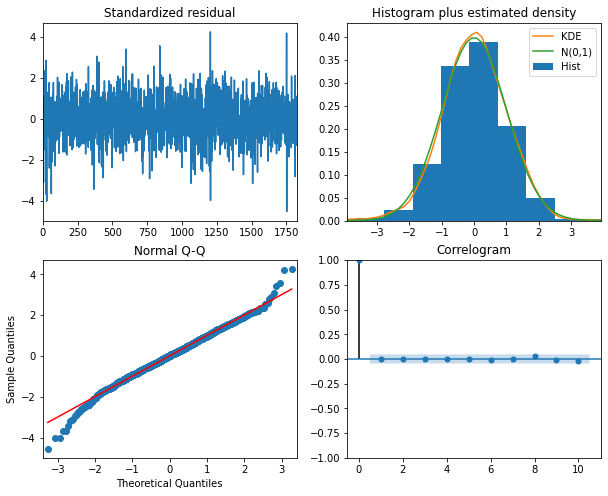

In [ ]:
model_avg.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
model_max = pm.auto_arima(data['MaxTemp'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_max.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=9.63 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=11642.384, Time=0.10 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=10128.196, Time=2.02 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=10071.815, Time=2.85 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=11640.488, Time=0.09 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=10929.850, Time=0.76 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=10072.652, Time=4.18 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=10072.826, Time=8.24 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=10451.665, Time=2.26 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=24.36 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=10890.152, Time=1.89 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=8.77 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=7.73 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=16.19 sec
 ARIMA(0,0,1)(0,1,1)[12]         

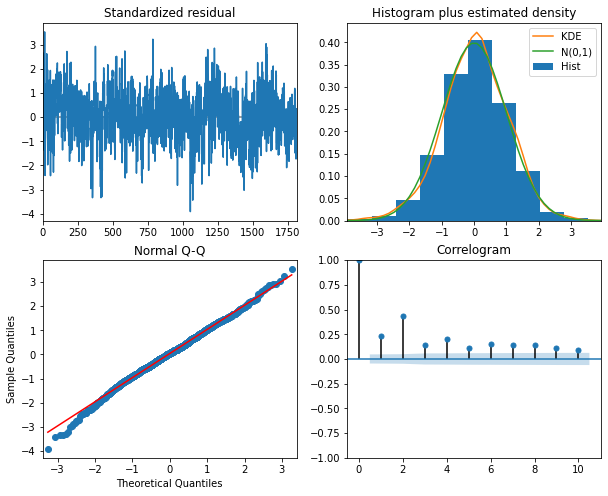

In [ ]:
model_max.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
model_min = pm.auto_arima(data['MinTemp'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_min.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=10568.985, Time=0.11 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=9169.144, Time=1.83 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=9071.693, Time=2.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=10567.149, Time=0.18 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=9867.869, Time=0.78 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=9073.654, Time=3.83 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=9073.654, Time=6.17 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=9405.325, Time=2.13 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=9075.678, Time=6.83 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=9862.448, Time=1.73 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=8849.014, Time=4.52 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=9717.247, Time=1.32 sec
 ARIMA(0,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=14.37 sec
 ARIMA(0,0,2)(0,1,2)[12] 

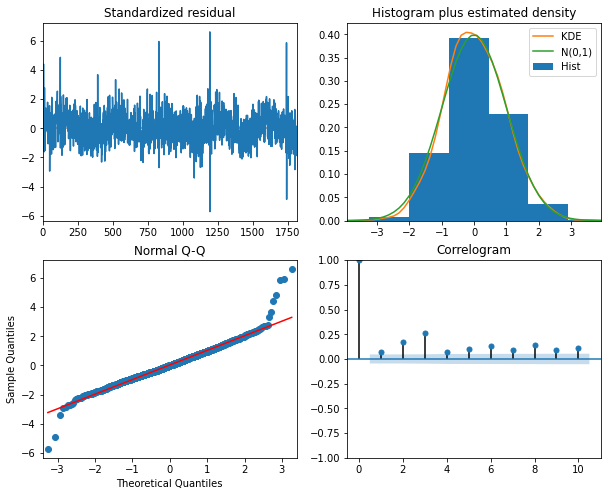

In [ ]:
model_min.plot_diagnostics(figsize=(10,8))
plt.show()

From the above result, we can conclude that ***AvgTemp*** shows the ARIMA(1,0,5) and for the ***MaxTemp***, ARIMA(0,0,1) and for the ***MinTemp***, ARIMA(0,0,2)is the best model for this dataset. 

### 6. What is the ADF(Augmented Dickey Fuller Test) used for detecting?

ADF is used for checking the stationarity.

In [ ]:
result=adfuller(data["MaxTemp"],autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -7.385541991893757
n_lags: 8.255678626847219e-11
p-value: 8.255678626847219e-11
Critial Values:
   1%, -3.4339600207952796
Critial Values:
   5%, -2.863134623063046
Critial Values:
   10%, -2.5676189242070433


In [ ]:
result=adfuller(data["MinTemp"],autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -4.870898113274482
n_lags: 3.972028814410033e-05
p-value: 3.972028814410033e-05
Critial Values:
   1%, -3.433976034843506
Critial Values:
   5%, -2.8631416925158244
Critial Values:
   10%, -2.5676226884667694


In [ ]:
result=adfuller(data["AvgTemp"],autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -6.989786128295853
n_lags: 7.798564366489307e-10
p-value: 7.798564366489307e-10
Critial Values:
   1%, -3.4339600207952796
Critial Values:
   5%, -2.863134623063046
Critial Values:
   10%, -2.5676189242070433


Hence the p-value is less than 0.05 for all the MinTemp, MaxTemp and AvgTemp, this data is considered to be as stationary data.

### Checking Seasonal Decompose for checking seasonality and trend in the data

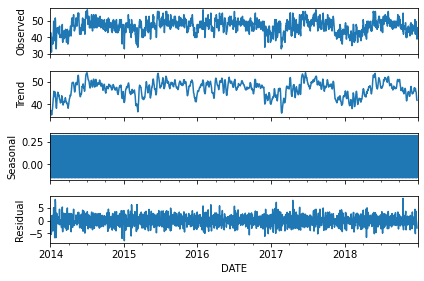

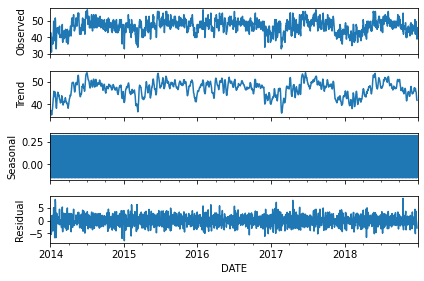

In [ ]:
decompose_result=seasonal_decompose(data['AvgTemp'])
decompose_result.plot()

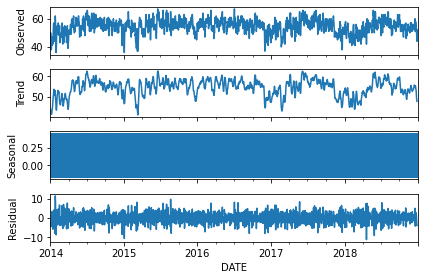

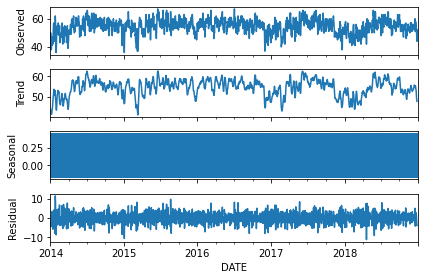

In [ ]:
decompose_result=seasonal_decompose(data['MaxTemp'])
decompose_result.plot()

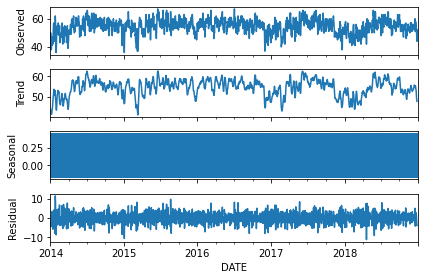

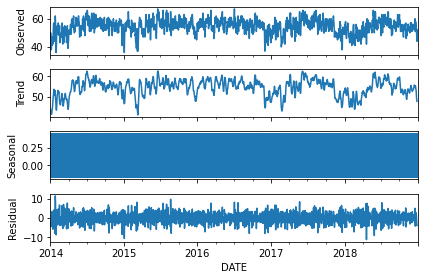

In [ ]:
decompose_result=seasonal_decompose(data['MaxTemp'])
decompose_result.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


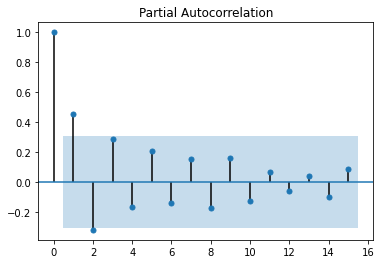

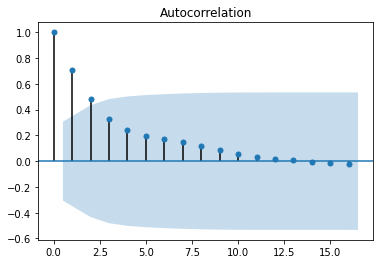

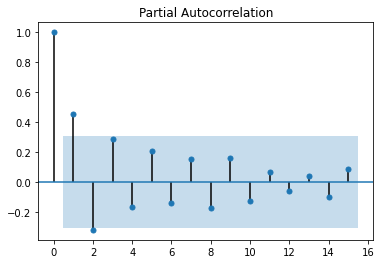

In [ ]:
acf_plot=acf(data['AvgTemp'])
pacf_plot=pacf(data['AvgTemp'])
plot_acf(acf_plot,lags=16)
plot_pacf(pacf_plot,lags=15)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


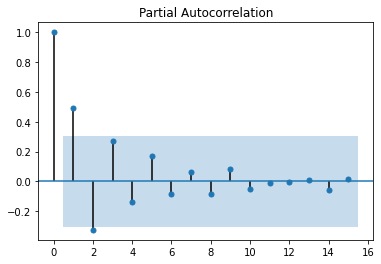

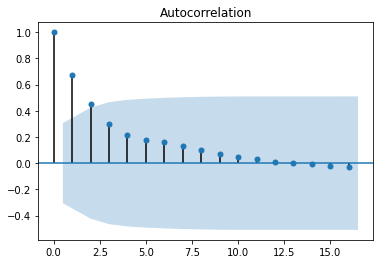

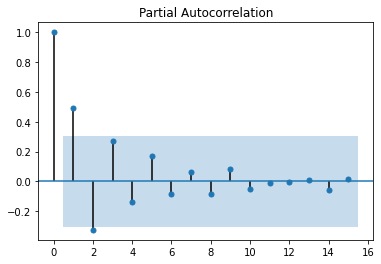

In [ ]:
acf_plot=acf(data['MaxTemp'])
pacf_plot=pacf(data['MaxTemp'])
plot_acf(acf_plot,lags=16)
plot_pacf(pacf_plot,lags=15)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


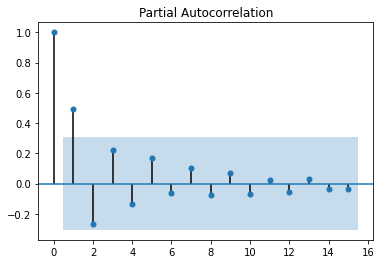

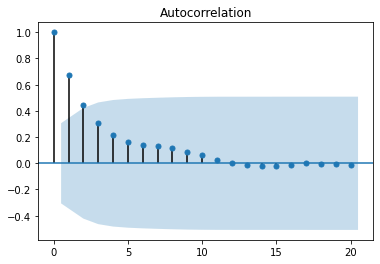

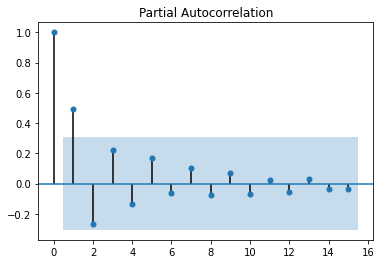

In [ ]:
acf_plot=acf(data['MinTemp'])
pacf_plot=pacf(data['MinTemp'])
plot_acf(acf_plot,lags=20)
plot_pacf(pacf_plot,lags=15)

The autocorrelation also predicts the randomness and stationarity in the data.

In [ ]:
train=data.iloc[:1725]["AvgTemp"]
test=data.iloc[100:]["AvgTemp"]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train,order=(1,0,5))

In [ ]:
result=model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1725
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3957.037
Date:                Thu, 14 Jul 2022   AIC                           7930.073
Time:                        18:02:43   BIC                           7973.697
Sample:                    01-01-2014   HQIC                          7946.211
                         - 09-21-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.6828      0.815     57.279      0.000      45.085      48.280
ar.L1          0.9869      0.005    193.217      0.000       0.977       0.997
ma.L1         -0.1633      0.022     -7.320      0.000      -0.207      -0.120
ma.L2         -0.2186      0.024     -9.127      0.000      -0.265      -0.172
ma.L3         -0.2035      0.024     -8.553      0.000      -0.250      -0.157
ma.L4         -0.1437      0.024     -6.053      0.000      -0.190      -0.097
ma.L5         -0.0756      0.025     -3.039      0.002      -0.124      -0.027
sigma2         5.7495      0.176     32.586      0.000       5.404       6.095
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                27.69
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.12
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions=result.predict(start=len(train),end=len(train)+len(test)-1, dynamic=False,typ='levels').rename('ARIMA(1, 0, 5) Predictions')

In [ ]:
test

DATE
2014-04-11    47.0
2014-04-12    44.0
2014-04-13    41.0
2014-04-14    41.0
2014-04-15    45.0
              ... 
2018-12-26    40.0
2018-12-27    39.0
2018-12-28    40.0
2018-12-29    42.0
2018-12-30    46.0
Name: AvgTemp, Length: 1725, dtype: float64

In [ ]:
for i in range(len(predictions)):
  print(f'Predicted={predictions[i]},Expected={test[i]}')

In [ ]:
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]

In [ ]:
forecast_errors

In [ ]:
bias = sum(forecast_errors)*1.0/len(test)
bias

0.3928077676846273

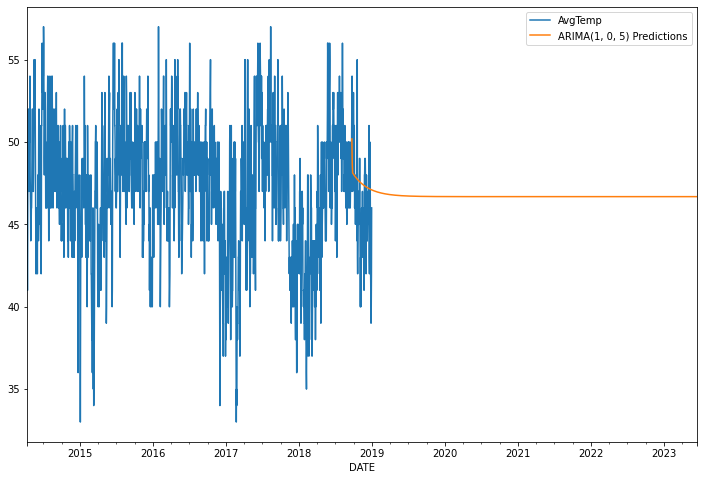

In [ ]:
ax=test.plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)

In [ ]:
error

15.69851247773758

In [ ]:
from statsmodels.tools.eval_measures import rmse
rmse_error=rmse(test,predictions)

In [ ]:
rmse_error


3.9621348384094124

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train,order=(1,0,5),seasonal_order=(0,0,6,12))
result_sarimax=model.fit()

In [ ]:
predictions_sarimax=result_sarimax.predict(start=len(train),end=len(train)+len(test)-1,dynamic=False,typ='levels')

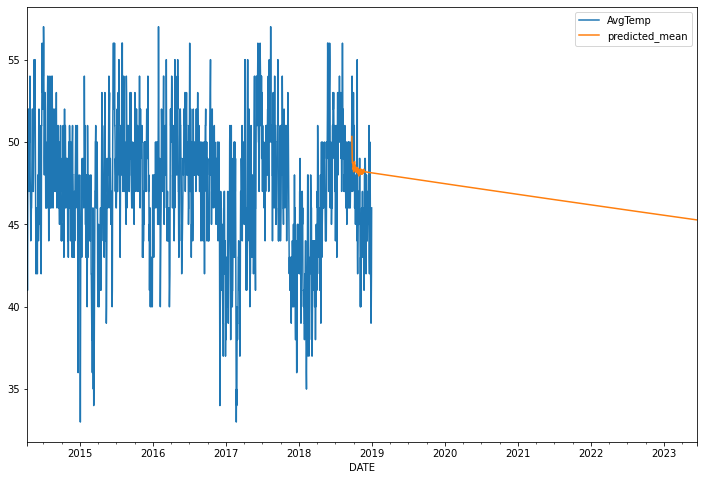

In [ ]:
ax=test.plot(legend=True,figsize=(12,8))
predictions_sarimax.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [ ]:
result_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                              
===========================================================================================================
Dep. Variable:                                             AvgTemp   No. Observations:                 1725
Model:             SARIMAX(1, 0, 5)x(0, 0, [1, 2, 3, 4, 5, 6], 12)   Log Likelihood               -3958.068
Date:                                             Thu, 14 Jul 2022   AIC                           7942.136
Time:                                                     18:04:26   BIC                           8013.024
Sample:                                                 01-01-2014   HQIC                          7968.360
                                                      - 09-21-2018                                         
Covariance Type:                                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   5900.940      0.000       1.000       1.000
ma.L1         -0.1780      0.022     -8.075      0.000      -0.221      -0.135
ma.L2         -0.2249      0.023     -9.696      0.000      -0.270      -0.179
ma.L3         -0.2082      0.024     -8.833      0.000      -0.254      -0.162
ma.L4         -0.1480      0.024     -6.235      0.000      -0.195      -0.102
ma.L5         -0.0820      0.024     -3.355      0.001      -0.130      -0.034
ma.S.L12      -0.0368      0.025     -1.475      0.140      -0.086       0.012
ma.S.L24      -0.0068      0.025     -0.269      0.788      -0.056       0.043
ma.S.L36      -0.0271      0.024     -1.109      0.267      -0.075       0.021
ma.S.L48       0.0174      0.025      0.701      0.483      -0.031       0.066
ma.S.L60       0.0667      0.024      2.754      0.006       0.019       0.114
ma.S.L72       0.0034      0.026      0.132      0.895      -0.047       0.054
sigma2         5.7374      0.178     32.237      0.000       5.389       6.086
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                16.18
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.06
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions_sarimax)
error

15.744557748713351

In [ ]:
from statsmodels.tools.eval_measures import rmse
rmse_error=rmse(test,predictions_sarimax)

In [ ]:
rmse_error

3.967941248142839